In [ ]:
#import stuff here
import itertools
import numpy as np
from random import random, randint
from copy import copy, deepcopy
from collections import defaultdict, Counter

# Step 1: Simulate Rankings of Relevance for E and P

In the first step generate pairs of rankings, for the production P and experimental E, respectively. Assume a binary relevance. Make no assumption regarding the documents returned by the two algorithms (they can be distinct but they may also overlap). Further, assume that the algorithms are used on mobiles, so we are interested only in rankings of length 3. 



In [2]:
def produce_rank(labels = [0, 1] , n=3):
    """Returns a list of size n with all permutations for the given labels."""
    return list(map(list, itertools.product(labels, repeat=n)))


def creat_rank_pairs(labels = [0, 1] , n=3):
    """Creates a list with all pairs of permutations of the given labels.
    Input:
        labels: list of the labels that should be permuted into a list.
        n: lengh of the list with labels.
    Return:
        list of lists of list with all possible pair combinations.
    >>> rank_pairs = creat_rank_pairs(labels = [0, 1] , n=2)   
    [[[0, 0], [0, 0]], [[0, 1], [0, 0]], ..., [[1, 0], [1, 1]], [[1, 1], [1, 1]]]
    """
    #creates permuations
    rank_e = produce_rank(labels , n)
    rank_p = produce_rank(labels , n)

    #combine the permutations in a list
    rank_pairs = [[rp, re] for re in rank_e for rp in rank_p]
            
    return rank_pairs
            
rank_pairs = creat_rank_pairs(labels = [0, 1] , n=3)  
print(rank_pairs)
print(len(rank_pairs))

[[[0, 0, 0], [0, 0, 0]], [[0, 0, 1], [0, 0, 0]], [[0, 1, 0], [0, 0, 0]], [[0, 1, 1], [0, 0, 0]], [[1, 0, 0], [0, 0, 0]], [[1, 0, 1], [0, 0, 0]], [[1, 1, 0], [0, 0, 0]], [[1, 1, 1], [0, 0, 0]], [[0, 0, 0], [0, 0, 1]], [[0, 0, 1], [0, 0, 1]], [[0, 1, 0], [0, 0, 1]], [[0, 1, 1], [0, 0, 1]], [[1, 0, 0], [0, 0, 1]], [[1, 0, 1], [0, 0, 1]], [[1, 1, 0], [0, 0, 1]], [[1, 1, 1], [0, 0, 1]], [[0, 0, 0], [0, 1, 0]], [[0, 0, 1], [0, 1, 0]], [[0, 1, 0], [0, 1, 0]], [[0, 1, 1], [0, 1, 0]], [[1, 0, 0], [0, 1, 0]], [[1, 0, 1], [0, 1, 0]], [[1, 1, 0], [0, 1, 0]], [[1, 1, 1], [0, 1, 0]], [[0, 0, 0], [0, 1, 1]], [[0, 0, 1], [0, 1, 1]], [[0, 1, 0], [0, 1, 1]], [[0, 1, 1], [0, 1, 1]], [[1, 0, 0], [0, 1, 1]], [[1, 0, 1], [0, 1, 1]], [[1, 1, 0], [0, 1, 1]], [[1, 1, 1], [0, 1, 1]], [[0, 0, 0], [1, 0, 0]], [[0, 0, 1], [1, 0, 0]], [[0, 1, 0], [1, 0, 0]], [[0, 1, 1], [1, 0, 0]], [[1, 0, 0], [1, 0, 0]], [[1, 0, 1], [1, 0, 0]], [[1, 1, 0], [1, 0, 0]], [[1, 1, 1], [1, 0, 0]], [[0, 0, 0], [1, 0, 1]], [[0, 0, 1], [1,

# Step 2: Calculate the 𝛥measure
Implement the aforementioned measure, ERR.

For all P and E ranking pairs constructed above calculate the difference: 𝛥measure = measureE-measureP. Consider only those pairs for which E outperforms P and group them such that group 1 contains all pairs for which 0.05 < 𝛥measure ≤ 0.1, group 2 all pairs for which 0.1 < 𝛥measure ≤ 0.2, etc.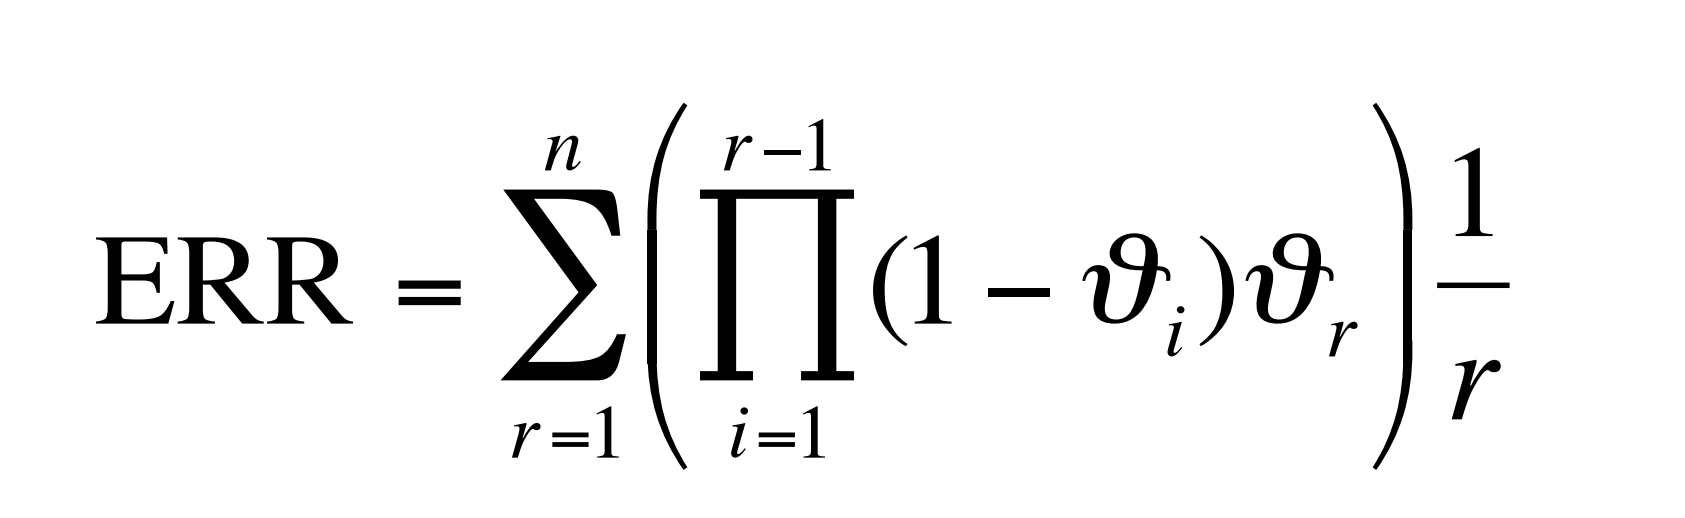

In [3]:
#delta_ERR = np.zeros((10,3))
#relevance_number = {"min": delta_ERR[:,0], "median": delta_ERR[:,1], "max": delta_ERR[:,2]}

def calculate_ERR(rank_list):
    """ Calculates the ERR for a ranked list of documents.
    Input: 
        rank_list: list of probabilities of stoping in that positon for each position in the rank.
    Output: ERR"""
    ERR = 0
    for r in range(len(rank_list)):
        temp = 1
        for i in range(r):
            temp *= 1-rank_list[i]
        ERR += temp*rank_list[r]/(r+1)
    return ERR

def group_dERRs(rank_pairs):
    """calculate the ERR values for the production and experimental system and groups their deltas into bins.
    Input:
        rank_pairs: a list of lists of list.
    Output: dictionary with the indeces of rank_pairs binned in groups from 0 to 9.
    """
    delta_ERR = {k:[] for k in range(10)}
    
    for i, p in enumerate(rank_pairs):
        
        #Calculate seperate ERRs
        #ERRs hardcoded to r= 3, that is not great implementation but it works.
        #ERR_p = p[0][0] + (1-p[0][0])*p[0][1]/2 + (1-p[0][0])*(1-p[0][1])*p[0][2]/3
        #ERR_e = p[1][0] + (1-p[1][0])*p[1][1]/2 + (1-p[1][0])*(1-p[1][1])*p[1][2]/3
        #calculation not deleted for testing reasons.
        
        ERR_p = calculate_ERR(p[0])
        ERR_e = calculate_ERR(p[1])
        
        #Groups the delta ERRs based on their differences
        d_ERR = ERR_e - ERR_p 
        if d_ERR >= 0.05 and d_ERR <= 0.95:
            #stores the index of the pair
            delta_ERR[int(d_ERR*10)].append(i)
            
    return delta_ERR

rank_pairs = creat_rank_pairs(labels = [0, 1] , n=3)
grouped_dERRs = group_dERRs(rank_pairs)
print(grouped_dERRs)

{0: [], 1: [17, 25], 2: [], 3: [8], 4: [], 5: [16, 24, 34, 35, 42, 43, 50, 51, 58, 59], 6: [33, 41, 49, 57], 7: [], 8: [], 9: []}


# Step 3: Implement Team-Draft Interleaving and Probabilistic Interleaving

Implement Team-Draft and Probabilistic Interleaving, with methods that interleave two rankings, and given the users clicks on the interleaved ranking assign credit to the algorithms that produced the rankings.

In [ ]:
def teamdraft_interleaving(A, B):
    """ Given two lists A and B, constructs a new interleaved list newl using team-draft interleaving
         The new list newl consists of three elements. A list source(same size as newl) is also constructed, where "A"
         means that the element of newl is present in list A, "B" in list B and "AB" in both.
    Input:
        list A, list B
    Output:
        list newl, list source
    """
    newl = []
    source = []  
        
    for idx in range(3):
        
        entry_a = A[idx]
        entry_b = B[idx]
        
        if random() < 0.5:
            
            if entry_a not in newl:
                newl.append(entry_a)
                source.append("A")
                
                if entry_b not in newl:
                    newl.append(entry_b)
                    source.append("B")
                    
            else:
                entry_a = A[idx + 1]
                newl.append(entry_a)
                source.append("A")
                    
        else:
            
            if entry_b not in newl:
                newl.append(entry_b)
                source.append("B")
                
                if entry_a not in newl:
                    newl.append(entry_a)
                    source.append("A")
                    
            else:
                entry_b = B[idx + 1]
                newl.append(entry_b)
                source.append("B")
    
        if len(newl) >= 3:
            break

    return newl[:3], source[:3]
    
        
def probabilistic_interleaving(A, B):
    """ Given two lists A and B, constructs a new interleaved list newl using probablistic interleaving
         The new list newl consists of three elements. A list source(same size as newl) is also constructed, where "A"
         means that the element of newl is present in list A, "B" in list B and "AB" in both.
    Input:
        list A, list B
    Output:
        list newl, list source
    """
    
    def assign_probabilities(rank_X, tau = 3):
        """ returns a probability distribution according to the inverse power rank
        Inputs:
            rank_X: np array of the ranked documents
            tau: int, default 3 (authors of original paper)
        Outputs:
            probability distribution of the documents
        """
        inverse_power_rank = 1 / np.power(rank_X, tau)
        normalizing_factor = inverse_power_rank.sum()
        return inverse_power_rank / normalizing_factor
    
    newl = []
    source = []
    
    rank_A = np.arange(len(A)) + 1
    rank_B = np.arange(len(B)) + 1
    
    while len(newl) < 3:
        
        if random() < 0.5:
            
            source.append("A")
            
            softmax = assign_probabilities(rank_A)
            cum_prob_distr = softmax.cumsum()
            random_point = random()
            
            try:
                doc_idx = np.where(random_point < cum_prob_distr)[0][0]
                doc = A[doc_idx]
            except IndexError:
                print("EERRRRROooooooooooooooooooooooooooR")
                break
            
            newl.append(doc)
            
            A.remove(doc)
            rank_A = np.delete(rank_A, doc_idx)
            
            if doc in B:
                rank_B = np.delete(rank_B, B.index(doc))
                B.remove(doc)
            
        else:
            
            source.append("B")
            
            softmax = assign_probabilities(rank_B)
            cum_prob_distr = softmax.cumsum()
            random_point = random()
            
            doc_idx = np.where(random_point < cum_prob_distr)[0][0]
            doc = B[doc_idx]
            
            newl.append(doc)
            
            B.remove(doc)
            rank_B = np.delete(rank_B, doc_idx)
            
            if doc in A:
                rank_A = np.delete(rank_A, A.index(doc))
                A.remove(doc)
            
    return newl[:3], source[:3]

# Step 4 Simulate User Clicks

In [ ]:
type_idx = 2
query_idx = 3
click_id_idx = 3
rank_idx = 5

def parseSession(buffer):
    if(len(buffer) == 0):
        return []
    
    query = buffer[0][query_idx]
    ranking = buffer[0][rank_idx:]
    clicks = [0] * len(ranking)
    
    for record in buffer[1:]:
        click_id = record[click_id_idx].replace('\n', '')
        if(click_id in ranking):
            idx = ranking.index(click_id)
            clicks[idx] = 1
    
    return (query, ranking, clicks)

# Returned format:
# list of (query_id, urls, clicks)
def loadData():
    S = []
    with open('YandexRelPredChallenge.txt', 'r') as file:
        buffer = []
        for line in file:
            values = line.split('\t')
            if(values[type_idx] == 'Q'):
                session = parseSession(buffer)
                if(len(session) > 0):
                    S.append(session)
                buffer = []
            buffer.append(values)

        session = parseSession(buffer)
        if(len(session) > 0):
            S.append(session)
    return S

In [6]:
S = loadData()
print('Total sessions:',len(S))

Total sessions: 42652


In [ ]:
class PBM:
    def __init__(self, max_rank, grades, epsilon):
        self.exams = [0.5] * max_rank
        self.attrs = defaultdict(lambda:0.5)
        self.epsilon = epsilon
        self.max_rank = max_rank
    
    def estimate_attractiveness(self, attrs, exams, max_rank, train_data):
        attrs_new = defaultdict(lambda:1)
        qu_counter = defaultdict(lambda:2)

        for query, urls, clicks in train_data:
            for r in range(max_rank):
                a = max(attrs[(query, urls[r])], 0.000001)
                g = max(exams[r], 0.000001)
                c = clicks[r]

                qu_counter[(query, urls[r])] += 1
                attrs_new[(query, urls[r])] += c + (1 - c) * ((1 - g) * a)/(1 - g * a)

        for key, value in qu_counter.items():
            attrs_new[key] /=  value

        return attrs_new
        
    def estimate_examination(self, attrs, exams, max_rank, train_data):
        exams_new = [0] * max_rank

        for query, urls, clicks in train_data:
            for r in range(max_rank):
                a = max(attrs[(query, urls[r])], 0.000001)
                g = max(exams[r], 0.000001)
                c = clicks[r]

                exams_new[r] += c + (1 - c) * (g * (1 - a))/(1 - g * a)

        for r in range(max_rank):
            exams_new[r] /= len(train_data)

        return exams_new
    
    def train(self, train_data, max_iterations = 50):
        for i in range(max_iterations):
            new_attrs = self.estimate_attractiveness(self.attrs, self.exams, self.max_rank, train_data)
            new_exams = self.estimate_examination(self.attrs, self.exams, self.max_rank, train_data)
                
            self.exams = new_exams
            self.attrs = new_attrs
        
            print(i,': train', self.exams)
        
    def predict_prob(self, ranking):
        prob = [0] * self.max_rank
        for r in range(self.max_rank):
            attr = 1 - self.epsilon if ranking[r] == 1 else self.epsilon
            prob[r] = self.exams[r] * attr
        return prob
        
    def sample_click(self, rank, probabilities):
        return 1 if random() < probabilities[rank] else 0;
        print('sample_click')
        

In [8]:
#Example
model_PBM = PBM(3,2,0.001)
model_PBM.train(S)

0 delta attr 6802.920329013964 delta exam 0.09968347465119964
1 delta attr 7491.496710506062 delta exam -0.17205405698282772
2 delta attr 4008.2123085912235 delta exam -0.17571201247904156
3 delta attr 1587.3481869747884 delta exam -0.14768588448382103
4 delta attr 511.81897045595554 delta exam -0.11634711992913505
5 delta attr 150.30804396897682 delta exam -0.09105192991955646
6 delta attr 40.22245867179466 delta exam -0.07206954717615499
7 delta attr 9.558688695025012 delta exam -0.05790488173674746
8 delta attr 2.000255756891712 delta exam -0.047173193924656576
9 delta attr 0.3679080379461871 delta exam -0.0388652240559455
10 delta attr 0.059320996503789074 delta exam -0.03229729485823196
11 delta attr 0.008355625851833227 delta exam -0.02701298050927159
12 delta attr 0.0010249645719565864 delta exam -0.022702751998533333
13 delta attr 0.00010926356864551112 delta exam -0.019150447760549194
14 delta attr 1.0110374161792325e-05 delta exam -0.016200033284667237
train [0.99981089 0.969

In [ ]:
# Random Click Model
class RCM:
    def __init__(self, max_rank, p):
        self.p = p
        self.max_rank = max_rank
    
    def train(self, train_data):
        print('nothing to train...')
        
    def predict_prob(self, ranking):
        return [self.p] * self.max_rank
        
    def sample_click(self, rank, probabilities):
        return 1 if random() < self.p else 0;
        

In [10]:
model_RCM = RCM(3,0.5)
model_RCM.train(S)
prob = model_RCM.predict_prob([1,1,1])
print(prob)
for _ in range(10):
    print(model_RCM.sample_click(2, prob))

nothing to train...
[0.5, 0.5, 0.5]
1
0
1
0
0
1
1
0
0
0


# Step 5: Simulate Interleaving Experiment
Having implemented the click model, it is time to run the simulated experiment.

For each of interleaving experiment run k simulations for each one of the two click models implemented and measure the proportion p of wins for E. Group these proportions in the respective group the interleaved ranking came from. The larger the k the better, but also the larger the k the longer it takes to run the experiment; so make a reasonable choice.

In [11]:
def create_document_permuts(rel_dict = {"a": 1, "b": 1, "c": 1, "d": 0, "e": 0, "f": 0}, l = 3):
    """Returns all permutations of documents and all combinations of two lists of permutations.
    Input:
        rel_dict: dictionary mapping keys to relevance.
        l: lengh of the list of permutations.
    Return:
        doc_permuts: all permutations of keys of rel_dict in tuples of lengh l.
        doc_lists: list of lists of combinations of the doc_permuts"""
    
    #create all possible permutations of lengh l
    doc_permuts = list(itertools.permutations(rel_dict.keys(), l)) 
    
    #create all combinations of two lists of doc_permutations 
    doc_lists = [[dp, de] for de in doc_permuts for dp in doc_permuts]
    
    return doc_permuts, doc_lists

#print (create_documents())

In [12]:
def oline_test_simulation(interleaving_method, click_model, k, rel_dict, doc_lists):
    """Simulates a online test using click_model
    Input:
        interleaving_methond: function that takes two lists of document keys and outputs a interleaved 
            list and the source of each position
        click_model: the click model;
        k: number of iterations
        rel_dict: dictinary mapping documents to relevances
        doc_lists: list of combinations of document keys
    Returns:
        wins_E: number of wins of the Experimental System
        wins_P: number of wins of the Production System
        ties: number of ties
    """
    
    wins_E = 0
    wins_P = 0
    ties = 0

    for i in range(k):
        #randomly choses a combination of doc_lists
        doc_idx = randint(0, len(doc_lists)-1)
        E = list(doc_lists[doc_idx][1])
        P = list(doc_lists[doc_idx][0])
        emergency_EP = (E.copy(), P.copy())
        
        #interleaves E and P
        newl, source = interleaving_method(E, P)
    
        #just in case
        if len(newl) != 3:
            print(f"ERROR {i} newl:", newl, "E:", E, "P:", P, "source:", source, "original EP:", emergency_EP)
            continue

        #gets the relevances for each document in the list
        relevances = [rel_dict[key] for key in newl]
        
        #simulates the online testing by using a click model
        prob = click_model.predict_prob(relevances)
        
        #counts the clicks that E and P gets
        c = [0]*len(newl)
        click_count_E = 0
        click_count_P = 0
        for j in range(len(newl)):
            c[j] = click_model.sample_click(j, prob) 
            if source[j] == "A":
                click_count_E += c[j]
            else: 
                click_count_P += c[j]
        
        #calculates wins of E and P and ties
        if click_count_E > click_count_P:     
            wins_E +=1
        elif click_count_E < click_count_P:
            wins_P +=1
        else:
            ties += 1
            
    return wins_E, wins_P, ties

rel_dict = {"a": 1, "b": 1, "c": 1, "d": 0, "e": 0, "f": 0}
doc_permuts, doc_lists = create_document_permuts(rel_dict = rel_dict, l = 3)
k = 10000
prop_wins_E = {}


print("Team draft + PBM")
interleaving_method = teamdraft_interleaving 
click_model = model_PBM
wins_E, wins_P, ties = oline_test_simulation(interleaving_method, click_model, k, rel_dict, doc_lists)
prop_wins_E["Team draft"] = [wins_E/sum((wins_E, wins_P, ties))]
print(wins_E, wins_P, ties)

print("Team draft + RCM")
interleaving_method = teamdraft_interleaving 
click_model = model_RCM
wins_E, wins_P, ties = oline_test_simulation(interleaving_method, click_model, k, rel_dict, doc_lists) 
prop_wins_E["Team draft"].append(wins_E/sum((wins_E, wins_P, ties)))
print(wins_E, wins_P, ties)

interleaving_method = probabilistic_interleaving 
click_model = model_PBM
print("probabilistic + PBM")
wins_E, wins_P, ties = oline_test_simulation(interleaving_method, click_model, k, rel_dict, doc_lists)  
prop_wins_E["Probabilistic"] = [wins_E/sum((wins_E, wins_P, ties))]
print(wins_E, wins_P, ties)

print("Probabilistic + RCM")
interleaving_method = probabilistic_interleaving 
click_model = model_RCM
wins_E, wins_P, ties = oline_test_simulation(interleaving_method, click_model, k, rel_dict, doc_lists)  
prop_wins_E["Probabilistic"].append(wins_E/sum((wins_E, wins_P, ties)))
print(wins_E, wins_P, ties)

print(prop_wins_E)

Team draft + PBM
2957 2930 4113
Team draft + RCM
3086 3136 3778
probabilistic + PBM
ERROR 2 newl: ['d', 'f'] E: ['c', 'b'] P: ['c'] source: ['B', 'B', 'B'] original EP: (['c', 'd', 'b'], ['f', 'c', 'd'])
ERROR 19 newl: ['d', 'b'] E: ['f'] P: ['f', 'c'] source: ['A', 'A', 'A'] original EP: (['d', 'b', 'f'], ['d', 'f', 'c'])
ERROR 40 newl: ['e', 'c'] E: ['f', 'd'] P: ['a'] source: ['B', 'B', 'B'] original EP: (['f', 'd', 'c'], ['e', 'a', 'c'])
ERROR 46 newl: ['b', 'd'] E: ['f', 'a'] P: ['a', 'f'] source: ['B', 'A', 'A'] original EP: (['d', 'f', 'a'], ['b', 'a', 'f'])
ERROR 52 newl: ['a', 'c'] E: ['b'] P: ['d'] source: ['A', 'B', 'B'] original EP: (['a', 'c', 'b'], ['c', 'a', 'd'])
ERROR 60 newl: ['c', 'a'] E: ['b'] P: ['e'] source: ['A', 'A', 'B'] original EP: (['c', 'a', 'b'], ['a', 'c', 'e'])
ERROR 64 newl: ['b'] E: ['a', 'c'] P: ['d', 'a', 'c'] source: ['A', 'A'] original EP: (['b', 'a', 'c'], ['d', 'a', 'c'])
ERROR 69 newl: ['e'] E: ['d', 'a'] P: ['a', 'b', 'd'] source: ['A', 'A'] or

ERROR 696 newl: ['a'] E: ['b', 'c', 'f'] P: ['b', 'c'] source: ['B', 'B'] original EP: (['b', 'c', 'f'], ['b', 'a', 'c'])
ERROR 703 newl: ['a', 'd'] E: ['e', 'b'] P: ['f'] source: ['B', 'B', 'B'] original EP: (['d', 'e', 'b'], ['a', 'd', 'f'])
ERROR 726 newl: ['c', 'f'] E: ['a', 'b', 'e'] P: ['d'] source: ['B', 'B', 'B'] original EP: (['a', 'b', 'e'], ['c', 'f', 'd'])
ERROR 753 newl: ['b', 'f'] E: ['a', 'd'] P: ['e'] source: ['B', 'B', 'B'] original EP: (['a', 'f', 'd'], ['b', 'f', 'e'])
ERROR 764 newl: ['a'] E: ['b', 'd'] P: ['f', 'b'] source: ['B', 'B'] original EP: (['b', 'a', 'd'], ['a', 'f', 'b'])
ERROR 766 newl: ['b'] E: ['e', 'c'] P: ['a', 'e', 'f'] source: ['A', 'A'] original EP: (['b', 'e', 'c'], ['a', 'e', 'f'])
ERROR 790 newl: ['d', 'a'] E: ['b'] P: ['b'] source: ['B', 'A', 'B'] original EP: (['d', 'a', 'b'], ['d', 'a', 'b'])
ERROR 791 newl: ['e', 'c'] E: ['a'] P: ['b', 'f'] source: ['A', 'A', 'B'] original EP: (['e', 'c', 'a'], ['b', 'c', 'f'])
ERROR 800 newl: ['e', 'b'] E:

ERROR 1582 newl: ['c', 'b'] E: ['a'] P: ['e', 'a'] source: ['B', 'A', 'A'] original EP: (['c', 'b', 'a'], ['e', 'c', 'a'])
ERROR 1589 newl: ['f'] E: ['b', 'c'] P: ['b', 'a'] source: ['B', 'A'] original EP: (['f', 'b', 'c'], ['f', 'b', 'a'])
ERROR 1599 newl: ['c', 'a'] E: ['d', 'f'] P: ['f', 'b'] source: ['B', 'A', 'A'] original EP: (['d', 'a', 'f'], ['c', 'f', 'b'])
ERROR 1642 newl: ['f', 'c'] E: ['d', 'b'] P: ['e'] source: ['A', 'B', 'B'] original EP: (['f', 'd', 'b'], ['c', 'f', 'e'])
ERROR 1643 newl: ['e', 'f'] E: ['b'] P: ['c'] source: ['A', 'A', 'B'] original EP: (['e', 'f', 'b'], ['f', 'e', 'c'])
ERROR 1647 newl: ['e', 'c'] E: ['d', 'f'] P: ['d'] source: ['B', 'B', 'B'] original EP: (['e', 'd', 'f'], ['e', 'c', 'd'])
ERROR 1653 newl: ['b'] E: ['a', 'c'] P: ['f', 'd'] source: ['B', 'B'] original EP: (['a', 'c', 'b'], ['b', 'f', 'd'])
ERROR 1654 newl: ['e', 'f'] E: ['b', 'c', 'd'] P: ['a'] source: ['B', 'B', 'B'] original EP: (['b', 'c', 'd'], ['e', 'f', 'a'])
ERROR 1687 newl: ['e'

ERROR 2404 newl: ['e', 'd'] E: ['c', 'f'] P: ['f'] source: ['B', 'A', 'B'] original EP: (['d', 'c', 'f'], ['e', 'f', 'd'])
ERROR 2410 newl: ['a', 'f'] E: ['e'] P: ['b'] source: ['B', 'B', 'B'] original EP: (['e', 'a', 'f'], ['a', 'f', 'b'])
ERROR 2415 newl: ['d', 'a'] E: ['f', 'b'] P: ['b', 'c'] source: ['B', 'A', 'A'] original EP: (['a', 'f', 'b'], ['d', 'b', 'c'])
ERROR 2416 newl: ['c', 'd'] E: ['b', 'e'] P: ['b'] source: ['A', 'B', 'A'] original EP: (['c', 'b', 'e'], ['d', 'b', 'c'])
ERROR 2418 newl: ['e'] E: ['d', 'a'] P: ['b', 'a'] source: ['B', 'B'] original EP: (['d', 'a', 'e'], ['e', 'b', 'a'])
ERROR 2423 newl: ['e'] E: ['f', 'd'] P: ['f', 'c'] source: ['B', 'B'] original EP: (['f', 'd', 'e'], ['e', 'f', 'c'])
ERROR 2424 newl: ['e', 'd'] E: ['b', 'f'] P: ['b'] source: ['B', 'B', 'B'] original EP: (['b', 'f', 'd'], ['e', 'd', 'b'])
ERROR 2441 newl: ['e', 'f'] E: ['a'] P: ['d', 'a'] source: ['A', 'A', 'A'] original EP: (['e', 'f', 'a'], ['d', 'e', 'a'])
ERROR 2443 newl: ['c', 'e'

ERROR 3033 newl: ['f', 'b'] E: ['c'] P: ['c'] source: ['A', 'B', 'B'] original EP: (['f', 'c', 'b'], ['f', 'b', 'c'])
ERROR 3061 newl: ['a', 'f'] E: ['e'] P: ['b', 'e'] source: ['A', 'A', 'A'] original EP: (['a', 'f', 'e'], ['b', 'a', 'e'])
ERROR 3066 newl: ['d', 'e'] E: ['f'] P: ['b'] source: ['A', 'A', 'B'] original EP: (['d', 'e', 'f'], ['e', 'd', 'b'])
ERROR 3071 newl: ['d', 'f'] E: ['b', 'a'] P: ['c'] source: ['B', 'A', 'B'] original EP: (['b', 'f', 'a'], ['d', 'c', 'f'])
ERROR 3087 newl: ['c', 'd'] E: ['b'] P: ['b', 'f', 'a'] source: ['A', 'A', 'A'] original EP: (['c', 'd', 'b'], ['b', 'f', 'a'])
ERROR 3099 newl: ['f'] E: ['b', 'd', 'e'] P: ['a', 'c'] source: ['B', 'B'] original EP: (['b', 'd', 'e'], ['f', 'a', 'c'])
ERROR 3104 newl: ['f', 'b'] E: ['a', 'e', 'c'] P: ['d'] source: ['B', 'B', 'B'] original EP: (['a', 'e', 'c'], ['f', 'b', 'd'])
ERROR 3113 newl: ['b', 'c'] E: ['f'] P: ['f'] source: ['A', 'B', 'B'] original EP: (['b', 'c', 'f'], ['c', 'b', 'f'])
ERROR 3118 newl: ['d'

ERROR 3697 newl: ['f', 'c'] E: ['e', 'a'] P: ['a'] source: ['A', 'B', 'B'] original EP: (['f', 'e', 'a'], ['a', 'f', 'c'])
ERROR 3698 newl: ['a', 'e'] E: ['b'] P: ['c'] source: ['B', 'B', 'B'] original EP: (['e', 'a', 'b'], ['a', 'e', 'c'])
ERROR 3701 newl: ['e'] E: ['f', 'b'] P: ['f', 'd', 'a'] source: ['A', 'A'] original EP: (['e', 'f', 'b'], ['f', 'd', 'a'])
ERROR 3702 newl: ['a', 'd'] E: ['c', 'e', 'b'] P: ['f'] source: ['B', 'B', 'B'] original EP: (['c', 'e', 'b'], ['a', 'd', 'f'])
ERROR 3720 newl: ['a', 'c'] E: ['f'] P: ['b', 'e'] source: ['A', 'A', 'B'] original EP: (['f', 'a', 'c'], ['b', 'e', 'c'])
ERROR 3731 newl: ['c'] E: ['f', 'e'] P: ['d', 'e'] source: ['B', 'A'] original EP: (['c', 'f', 'e'], ['c', 'd', 'e'])
ERROR 3741 newl: ['f', 'e'] E: ['a', 'b'] P: ['a'] source: ['B', 'B', 'B'] original EP: (['a', 'e', 'b'], ['f', 'a', 'e'])
ERROR 3743 newl: ['c', 'b'] E: ['e'] P: ['a'] source: ['A', 'A', 'A'] original EP: (['c', 'e', 'b'], ['a', 'c', 'b'])
ERROR 3748 newl: ['f'] E: 

ERROR 4510 newl: ['e', 'b'] E: ['a'] P: ['c'] source: ['A', 'B', 'B'] original EP: (['e', 'a', 'b'], ['c', 'b', 'e'])
ERROR 4512 newl: ['c', 'f'] E: ['a'] P: ['e', 'd'] source: ['A', 'A', 'B'] original EP: (['c', 'f', 'a'], ['c', 'e', 'd'])
ERROR 4521 newl: ['b', 'e'] E: ['f'] P: ['f'] source: ['B', 'A', 'B'] original EP: (['b', 'e', 'f'], ['b', 'e', 'f'])
ERROR 4524 newl: ['d', 'f'] E: ['c'] P: ['c'] source: ['A', 'B', 'B'] original EP: (['d', 'c', 'f'], ['f', 'c', 'd'])
ERROR 4529 newl: ['a', 'd'] E: ['b'] P: ['c'] source: ['A', 'A', 'A'] original EP: (['a', 'd', 'b'], ['a', 'd', 'c'])
ERROR 4530 newl: ['b', 'a'] E: ['e'] P: ['e', 'c'] source: ['B', 'A', 'A'] original EP: (['a', 'b', 'e'], ['b', 'e', 'c'])
ERROR 4532 newl: ['a', 'e'] E: ['b'] P: ['b', 'd'] source: ['A', 'A', 'A'] original EP: (['a', 'e', 'b'], ['e', 'b', 'd'])
ERROR 4543 newl: ['b'] E: ['a', 'f', 'c'] P: ['f', 'a'] source: ['B', 'B'] original EP: (['a', 'f', 'c'], ['b', 'f', 'a'])
ERROR 4545 newl: ['b', 'c'] E: ['e',

ERROR 5046 newl: ['e', 'a'] E: ['b'] P: ['c', 'd', 'b'] source: ['A', 'A', 'A'] original EP: (['e', 'a', 'b'], ['c', 'd', 'b'])
ERROR 5047 newl: ['b', 'c'] E: ['d', 'e'] P: ['d'] source: ['B', 'A', 'B'] original EP: (['c', 'd', 'e'], ['b', 'd', 'c'])
ERROR 5048 newl: ['f'] E: ['b', 'd', 'a'] P: ['c', 'd'] source: ['B', 'B'] original EP: (['b', 'd', 'a'], ['f', 'c', 'd'])
ERROR 5050 newl: ['d', 'f'] E: ['e'] P: ['e', 'a'] source: ['B', 'A', 'A'] original EP: (['d', 'f', 'e'], ['d', 'e', 'a'])
ERROR 5070 newl: ['a', 'c'] E: ['b'] P: ['b'] source: ['B', 'B', 'A'] original EP: (['a', 'b', 'c'], ['a', 'c', 'b'])
ERROR 5081 newl: ['c', 'a'] E: ['f'] P: ['e'] source: ['A', 'A', 'B'] original EP: (['c', 'a', 'f'], ['a', 'c', 'e'])
ERROR 5093 newl: ['e'] E: ['b', 'f', 'c'] P: ['b', 'c'] source: ['B', 'B'] original EP: (['b', 'f', 'c'], ['e', 'b', 'c'])
ERROR 5118 newl: ['e', 'd'] E: ['f', 'c'] P: ['b'] source: ['A', 'B', 'B'] original EP: (['e', 'f', 'c'], ['d', 'e', 'b'])
ERROR 5119 newl: ['b'

ERROR 5827 newl: ['d'] E: ['a', 'e'] P: ['a', 'c'] source: ['B', 'A'] original EP: (['d', 'a', 'e'], ['d', 'a', 'c'])
ERROR 5829 newl: ['a'] E: ['b', 'd'] P: ['d', 'c'] source: ['B', 'A'] original EP: (['b', 'd', 'a'], ['a', 'd', 'c'])
ERROR 5830 newl: ['c', 'a'] E: ['e'] P: ['b', 'f'] source: ['A', 'A', 'A'] original EP: (['c', 'a', 'e'], ['b', 'c', 'f'])
ERROR 5835 newl: ['f'] E: ['b', 'c'] P: ['d', 'c'] source: ['A', 'A'] original EP: (['f', 'b', 'c'], ['d', 'f', 'c'])
ERROR 5836 newl: ['c', 'a'] E: ['d'] P: ['b', 'f'] source: ['B', 'A', 'B'] original EP: (['a', 'c', 'd'], ['c', 'b', 'f'])
ERROR 5852 newl: ['e', 'b'] E: ['c'] P: ['c', 'd'] source: ['A', 'B', 'A'] original EP: (['e', 'b', 'c'], ['b', 'c', 'd'])
ERROR 5863 newl: ['f', 'a'] E: ['b'] P: ['c', 'e'] source: ['B', 'A', 'A'] original EP: (['a', 'b', 'f'], ['f', 'c', 'e'])
ERROR 5876 newl: ['a', 'f'] E: ['e', 'c'] P: ['d'] source: ['A', 'B', 'B'] original EP: (['a', 'e', 'c'], ['a', 'f', 'd'])
ERROR 5905 newl: ['c', 'b'] E: 

ERROR 6673 newl: ['d', 'e'] E: ['f', 'a'] P: ['a'] source: ['B', 'B', 'B'] original EP: (['f', 'd', 'a'], ['d', 'e', 'a'])
ERROR 6677 newl: ['c', 'a'] E: ['b', 'e'] P: ['f'] source: ['B', 'A', 'B'] original EP: (['a', 'b', 'e'], ['c', 'f', 'a'])
ERROR 6687 newl: ['d', 'e'] E: ['c', 'b'] P: ['b'] source: ['B', 'B', 'B'] original EP: (['e', 'c', 'b'], ['e', 'd', 'b'])
ERROR 6692 newl: ['f', 'd'] E: ['b', 'a'] P: ['e'] source: ['B', 'B', 'B'] original EP: (['f', 'b', 'a'], ['f', 'd', 'e'])
ERROR 6696 newl: ['f', 'b'] E: ['e', 'c'] P: ['c'] source: ['A', 'B', 'B'] original EP: (['e', 'c', 'f'], ['f', 'b', 'c'])
ERROR 6705 newl: ['c', 'b'] E: ['e'] P: ['f', 'a', 'e'] source: ['A', 'A', 'A'] original EP: (['c', 'b', 'e'], ['f', 'a', 'e'])
ERROR 6706 newl: ['e'] E: ['d', 'c'] P: ['a', 'd', 'f'] source: ['A', 'A'] original EP: (['e', 'd', 'c'], ['a', 'd', 'f'])
ERROR 6714 newl: ['a', 'b'] E: ['f', 'c'] P: ['c'] source: ['B', 'B', 'B'] original EP: (['b', 'f', 'c'], ['a', 'b', 'c'])
ERROR 6718 

ERROR 7561 newl: ['f'] E: ['c', 'a'] P: ['d', 'c', 'b'] source: ['A', 'A'] original EP: (['f', 'c', 'a'], ['d', 'c', 'b'])
ERROR 7563 newl: ['a', 'f'] E: ['d', 'c'] P: ['d'] source: ['A', 'B', 'B'] original EP: (['a', 'd', 'c'], ['a', 'f', 'd'])
ERROR 7565 newl: ['e', 'f'] E: ['d'] P: ['d', 'b'] source: ['A', 'B', 'A'] original EP: (['e', 'd', 'f'], ['f', 'd', 'b'])
ERROR 7574 newl: ['c', 'f'] E: ['d', 'a'] P: ['e'] source: ['A', 'B', 'B'] original EP: (['c', 'd', 'a'], ['f', 'e', 'c'])
ERROR 7577 newl: ['f', 'e'] E: ['a'] P: ['a'] source: ['A', 'B', 'B'] original EP: (['f', 'e', 'a'], ['f', 'e', 'a'])
ERROR 7595 newl: ['f', 'c'] E: ['b', 'e'] P: ['a'] source: ['B', 'B', 'A'] original EP: (['b', 'f', 'e'], ['f', 'c', 'a'])
ERROR 7613 newl: ['c', 'b'] E: ['a', 'f'] P: ['e', 'd'] source: ['B', 'A', 'A'] original EP: (['b', 'a', 'f'], ['e', 'c', 'd'])
ERROR 7615 newl: ['b'] E: ['e', 'a'] P: ['c', 'e', 'f'] source: ['A', 'A'] original EP: (['e', 'b', 'a'], ['c', 'e', 'f'])
ERROR 7620 newl:

ERROR 8492 newl: ['a'] E: ['f', 'b'] P: ['f', 'e'] source: ['B', 'A'] original EP: (['a', 'f', 'b'], ['a', 'f', 'e'])
ERROR 8500 newl: ['a'] E: ['d', 'f', 'e'] P: ['c', 'b'] source: ['B', 'B'] original EP: (['d', 'f', 'e'], ['a', 'c', 'b'])
ERROR 8501 newl: ['c', 'a'] E: ['d'] P: ['e', 'f'] source: ['A', 'A', 'A'] original EP: (['c', 'a', 'd'], ['a', 'e', 'f'])
ERROR 8518 newl: ['e', 'd'] E: ['b'] P: ['a'] source: ['B', 'B', 'B'] original EP: (['b', 'd', 'e'], ['e', 'a', 'd'])
ERROR 8525 newl: ['a', 'c'] E: ['f', 'b', 'e'] P: ['b'] source: ['B', 'B', 'B'] original EP: (['f', 'b', 'e'], ['a', 'c', 'b'])
ERROR 8529 newl: ['a', 'd'] E: ['c'] P: ['b'] source: ['B', 'A', 'A'] original EP: (['d', 'a', 'c'], ['a', 'b', 'd'])
ERROR 8537 newl: ['e', 'c'] E: ['a', 'b'] P: ['d'] source: ['A', 'B', 'B'] original EP: (['e', 'a', 'b'], ['c', 'd', 'e'])
ERROR 8550 newl: ['a', 'c'] E: ['f'] P: ['e'] source: ['B', 'A', 'A'] original EP: (['c', 'f', 'a'], ['a', 'c', 'e'])
ERROR 8552 newl: ['e'] E: ['f',

ERROR 9215 newl: ['e'] E: ['b', 'd'] P: ['b', 'c'] source: ['A', 'A'] original EP: (['e', 'b', 'd'], ['e', 'b', 'c'])
ERROR 9217 newl: ['b', 'e'] E: ['a', 'f'] P: ['a', 'f'] source: ['B', 'A', 'B'] original EP: (['e', 'a', 'f'], ['b', 'a', 'f'])
ERROR 9225 newl: ['a', 'e'] E: ['c', 'd'] P: ['c'] source: ['B', 'B', 'B'] original EP: (['c', 'a', 'd'], ['a', 'e', 'c'])
ERROR 9241 newl: ['d'] E: ['a', 'c'] P: ['b', 'c'] source: ['A', 'A'] original EP: (['d', 'a', 'c'], ['b', 'd', 'c'])
ERROR 9246 newl: ['d', 'a'] E: ['b'] P: ['f'] source: ['A', 'B', 'A'] original EP: (['d', 'b', 'a'], ['d', 'a', 'f'])
ERROR 9255 newl: ['d', 'c'] E: ['b', 'f'] P: ['a', 'e'] source: ['A', 'B', 'B'] original EP: (['d', 'b', 'f'], ['c', 'a', 'e'])
ERROR 9286 newl: ['d'] E: ['c', 'a'] P: ['c', 'e'] source: ['B', 'A'] original EP: (['c', 'd', 'a'], ['d', 'c', 'e'])
ERROR 9288 newl: ['e'] E: ['a', 'c'] P: ['c', 'b'] source: ['B', 'B'] original EP: (['a', 'c', 'e'], ['e', 'c', 'b'])
ERROR 9290 newl: ['a'] E: ['c',

ERROR 525 newl: ['f', 'e'] E: ['a'] P: ['b'] source: ['B', 'A', 'B'] original EP: (['f', 'e', 'a'], ['f', 'b', 'e'])
ERROR 529 newl: ['b', 'c'] E: ['d'] P: ['f', 'd'] source: ['A', 'A', 'A'] original EP: (['b', 'c', 'd'], ['f', 'd', 'c'])
ERROR 537 newl: ['c', 'a'] E: ['e'] P: ['d'] source: ['B', 'A', 'B'] original EP: (['c', 'a', 'e'], ['c', 'd', 'a'])
ERROR 539 newl: ['f', 'd'] E: ['b'] P: ['a', 'b'] source: ['B', 'A', 'B'] original EP: (['d', 'f', 'b'], ['a', 'f', 'b'])
ERROR 543 newl: ['c', 'd'] E: ['b'] P: ['b'] source: ['B', 'A', 'B'] original EP: (['d', 'c', 'b'], ['c', 'b', 'd'])
ERROR 558 newl: ['d', 'b'] E: ['c', 'f'] P: ['f'] source: ['A', 'B', 'B'] original EP: (['d', 'c', 'f'], ['d', 'b', 'f'])
ERROR 570 newl: ['c', 'e'] E: ['b'] P: ['d'] source: ['B', 'A', 'A'] original EP: (['c', 'e', 'b'], ['c', 'e', 'd'])
ERROR 585 newl: ['c', 'a'] E: ['f'] P: ['f'] source: ['B', 'B', 'B'] original EP: (['f', 'a', 'c'], ['c', 'f', 'a'])
ERROR 587 newl: ['d', 'b'] E: ['e'] P: ['f', 'e']

ERROR 1594 newl: ['a', 'f'] E: ['d'] P: ['e', 'd'] source: ['A', 'A', 'A'] original EP: (['a', 'f', 'd'], ['e', 'f', 'd'])
ERROR 1620 newl: ['b'] E: ['d', 'f'] P: ['f', 'd'] source: ['A', 'B'] original EP: (['b', 'd', 'f'], ['f', 'b', 'd'])
ERROR 1621 newl: ['b'] E: ['e', 'c'] P: ['d', 'f'] source: ['B', 'A'] original EP: (['b', 'e', 'c'], ['b', 'd', 'f'])
ERROR 1628 newl: ['e'] E: ['c', 'a'] P: ['a', 'c'] source: ['A', 'B'] original EP: (['e', 'c', 'a'], ['e', 'a', 'c'])
ERROR 1645 newl: ['c'] E: ['e', 'b'] P: ['d', 'e'] source: ['A', 'A'] original EP: (['e', 'c', 'b'], ['d', 'e', 'c'])
ERROR 1652 newl: ['a', 'e'] E: ['f'] P: ['c'] source: ['A', 'A', 'B'] original EP: (['a', 'e', 'f'], ['e', 'a', 'c'])
ERROR 1655 newl: ['f', 'a'] E: ['e', 'c'] P: ['c'] source: ['B', 'B', 'B'] original EP: (['e', 'c', 'f'], ['f', 'a', 'c'])
ERROR 1671 newl: ['f', 'c'] E: ['e'] P: ['e', 'b'] source: ['A', 'B', 'B'] original EP: (['f', 'e', 'c'], ['c', 'e', 'b'])
ERROR 1675 newl: ['d', 'c'] E: ['a'] P: [

ERROR 2416 newl: ['a', 'e'] E: ['b', 'f'] P: ['b'] source: ['B', 'B', 'B'] original EP: (['b', 'f', 'a'], ['a', 'e', 'b'])
ERROR 2417 newl: ['a', 'e'] E: ['d', 'f'] P: ['b', 'd'] source: ['A', 'B', 'A'] original EP: (['a', 'd', 'f'], ['e', 'b', 'd'])
ERROR 2418 newl: ['b', 'e'] E: ['d'] P: ['f', 'd'] source: ['A', 'A', 'A'] original EP: (['b', 'e', 'd'], ['f', 'd', 'b'])
ERROR 2428 newl: ['d', 'e'] E: ['a'] P: ['f'] source: ['A', 'A', 'B'] original EP: (['d', 'e', 'a'], ['e', 'd', 'f'])
ERROR 2437 newl: ['c', 'd'] E: ['b'] P: ['a', 'b', 'e'] source: ['A', 'A', 'A'] original EP: (['c', 'd', 'b'], ['a', 'b', 'e'])
ERROR 2444 newl: ['f', 'd'] E: ['a', 'b', 'e'] P: ['e'] source: ['B', 'B', 'B'] original EP: (['a', 'b', 'e'], ['f', 'd', 'e'])
ERROR 2452 newl: ['a', 'e'] E: ['b'] P: ['b'] source: ['A', 'B', 'A'] original EP: (['a', 'b', 'e'], ['a', 'b', 'e'])
ERROR 2453 newl: ['c', 'f'] E: ['a'] P: ['d', 'b'] source: ['A', 'B', 'A'] original EP: (['c', 'f', 'a'], ['f', 'd', 'b'])
ERROR 2461 

ERROR 3291 newl: ['c'] E: ['a', 'd', 'f'] P: ['e', 'f'] source: ['B', 'B'] original EP: (['a', 'd', 'f'], ['c', 'e', 'f'])
ERROR 3292 newl: ['e', 'f'] E: ['b'] P: ['d'] source: ['A', 'B', 'A'] original EP: (['e', 'b', 'f'], ['e', 'f', 'd'])
ERROR 3301 newl: ['c', 'e'] E: ['f'] P: ['a', 'f'] source: ['A', 'A', 'A'] original EP: (['c', 'e', 'f'], ['e', 'a', 'f'])
ERROR 3310 newl: ['f'] E: ['e', 'c'] P: ['d', 'e', 'a'] source: ['A', 'A'] original EP: (['f', 'e', 'c'], ['d', 'e', 'a'])
ERROR 3323 newl: ['f', 'e'] E: ['b'] P: ['d'] source: ['B', 'A', 'B'] original EP: (['e', 'f', 'b'], ['f', 'e', 'd'])
ERROR 3334 newl: ['d'] E: ['e', 'b'] P: ['e', 'b'] source: ['B', 'B'] original EP: (['e', 'b', 'd'], ['d', 'e', 'b'])
ERROR 3339 newl: ['f', 'a'] E: ['e'] P: ['e', 'd'] source: ['A', 'B', 'A'] original EP: (['f', 'e', 'a'], ['a', 'e', 'd'])
ERROR 3345 newl: ['e', 'f'] E: ['a'] P: ['d'] source: ['A', 'B', 'B'] original EP: (['e', 'a', 'f'], ['f', 'e', 'd'])
ERROR 3347 newl: ['e'] E: ['a', 'f']

ERROR 4697 newl: ['c', 'd'] E: ['e'] P: ['a'] source: ['B', 'A', 'A'] original EP: (['c', 'd', 'e'], ['d', 'c', 'a'])
ERROR 4711 newl: ['f'] E: ['a', 'b'] P: ['d', 'b'] source: ['B', 'A'] original EP: (['a', 'b', 'f'], ['f', 'd', 'b'])
ERROR 4726 newl: ['c', 'a'] E: ['f', 'b', 'd'] P: ['e'] source: ['B', 'B', 'B'] original EP: (['f', 'b', 'd'], ['c', 'a', 'e'])
ERROR 4731 newl: ['e', 'a'] E: ['c'] P: ['b', 'd'] source: ['B', 'A', 'A'] original EP: (['a', 'e', 'c'], ['e', 'b', 'd'])
ERROR 4740 newl: ['e', 'f'] E: ['a'] P: ['a'] source: ['A', 'B', 'B'] original EP: (['f', 'e', 'a'], ['f', 'a', 'e'])
ERROR 4741 newl: ['f', 'a'] E: ['d', 'c', 'e'] P: ['d'] source: ['B', 'B', 'B'] original EP: (['d', 'c', 'e'], ['f', 'a', 'd'])
ERROR 4745 newl: ['c', 'f'] E: ['a', 'b'] P: ['a'] source: ['B', 'B', 'B'] original EP: (['f', 'a', 'b'], ['c', 'f', 'a'])
ERROR 4764 newl: ['c', 'e'] E: ['b'] P: ['f'] source: ['A', 'B', 'B'] original EP: (['c', 'b', 'e'], ['e', 'f', 'c'])
ERROR 4771 newl: ['f', 'd'

ERROR 5612 newl: ['d'] E: ['f', 'a'] P: ['b', 'c'] source: ['A', 'A'] original EP: (['d', 'f', 'a'], ['b', 'c', 'd'])
ERROR 5619 newl: ['e', 'a'] E: ['c'] P: ['c', 'f'] source: ['A', 'A', 'B'] original EP: (['e', 'a', 'c'], ['c', 'f', 'e'])
ERROR 5626 newl: ['e', 'd'] E: ['a'] P: ['b'] source: ['A', 'B', 'A'] original EP: (['e', 'a', 'd'], ['d', 'e', 'b'])
ERROR 5632 newl: ['c', 'e'] E: ['f'] P: ['f', 'b', 'a'] source: ['A', 'A', 'A'] original EP: (['e', 'c', 'f'], ['f', 'b', 'a'])
ERROR 5634 newl: ['c', 'e'] E: ['b'] P: ['b'] source: ['A', 'A', 'A'] original EP: (['c', 'e', 'b'], ['c', 'e', 'b'])
ERROR 5635 newl: ['f', 'a'] E: ['c'] P: ['b'] source: ['B', 'A', 'B'] original EP: (['f', 'a', 'c'], ['b', 'f', 'a'])
ERROR 5637 newl: ['d', 'e'] E: ['a'] P: ['f'] source: ['B', 'B', 'B'] original EP: (['d', 'e', 'a'], ['d', 'e', 'f'])
ERROR 5657 newl: ['f'] E: ['b', 'e'] P: ['d', 'a', 'b'] source: ['A', 'A'] original EP: (['b', 'f', 'e'], ['d', 'a', 'b'])
ERROR 5660 newl: ['c'] E: ['a', 'b']

ERROR 6446 newl: ['a', 'd'] E: ['c', 'f'] P: ['e'] source: ['B', 'B', 'A'] original EP: (['d', 'c', 'f'], ['a', 'd', 'e'])
ERROR 6450 newl: ['e'] E: ['a', 'c'] P: ['b', 'c'] source: ['B', 'A'] original EP: (['e', 'a', 'c'], ['e', 'b', 'c'])
ERROR 6457 newl: ['b', 'c'] E: ['f'] P: ['d', 'f'] source: ['B', 'A', 'A'] original EP: (['c', 'f', 'b'], ['b', 'd', 'f'])
ERROR 6469 newl: ['c', 'f'] E: ['e'] P: ['d', 'e'] source: ['A', 'A', 'A'] original EP: (['c', 'e', 'f'], ['d', 'f', 'e'])
ERROR 6472 newl: ['e', 'a'] E: ['d'] P: ['b'] source: ['A', 'B', 'A'] original EP: (['e', 'a', 'd'], ['a', 'e', 'b'])
ERROR 6484 newl: ['c'] E: ['d', 'e'] P: ['d', 'f'] source: ['A', 'B'] original EP: (['c', 'd', 'e'], ['d', 'c', 'f'])
ERROR 6488 newl: ['c', 'b'] E: ['e'] P: ['a'] source: ['A', 'B', 'B'] original EP: (['c', 'b', 'e'], ['b', 'a', 'c'])
ERROR 6489 newl: ['e', 'c'] E: ['f'] P: ['a'] source: ['B', 'B', 'A'] original EP: (['f', 'c', 'e'], ['e', 'c', 'a'])
ERROR 6498 newl: ['b'] E: ['c', 'f'] P: [

ERROR 7268 newl: ['b'] E: ['c', 'e'] P: ['d', 'c', 'f'] source: ['A', 'A'] original EP: (['b', 'c', 'e'], ['d', 'c', 'f'])
ERROR 7271 newl: ['b'] E: ['a', 'c'] P: ['a', 'd', 'f'] source: ['A', 'A'] original EP: (['b', 'a', 'c'], ['a', 'd', 'f'])
ERROR 7288 newl: ['d'] E: ['c', 'e'] P: ['c', 'a'] source: ['A', 'B'] original EP: (['d', 'c', 'e'], ['c', 'a', 'd'])
ERROR 7298 newl: ['d', 'e'] E: ['a'] P: ['f'] source: ['A', 'A', 'B'] original EP: (['d', 'e', 'a'], ['e', 'd', 'f'])
ERROR 7302 newl: ['c', 'a'] E: ['f'] P: ['d', 'e'] source: ['A', 'A', 'A'] original EP: (['a', 'c', 'f'], ['d', 'c', 'e'])
ERROR 7314 newl: ['d'] E: ['e', 'a'] P: ['c', 'e'] source: ['A', 'B'] original EP: (['e', 'd', 'a'], ['c', 'd', 'e'])
ERROR 7317 newl: ['d', 'b'] E: ['e'] P: ['f', 'c'] source: ['A', 'A', 'A'] original EP: (['d', 'b', 'e'], ['f', 'c', 'd'])
ERROR 7321 newl: ['a', 'b'] E: ['c', 'e', 'd'] P: ['c'] source: ['B', 'B', 'B'] original EP: (['c', 'e', 'd'], ['a', 'c', 'b'])
ERROR 7352 newl: ['c', 'a'

ERROR 8099 newl: ['e'] E: ['d', 'b'] P: ['c', 'f'] source: ['B', 'B'] original EP: (['d', 'e', 'b'], ['e', 'c', 'f'])
ERROR 8123 newl: ['d', 'c'] E: ['b'] P: ['b', 'e'] source: ['A', 'A', 'A'] original EP: (['d', 'b', 'c'], ['b', 'd', 'e'])
ERROR 8132 newl: ['a', 'e'] E: ['b', 'd', 'c'] P: ['f'] source: ['B', 'B', 'B'] original EP: (['b', 'd', 'c'], ['a', 'e', 'f'])
ERROR 8148 newl: ['e'] E: ['f', 'a'] P: ['f', 'a'] source: ['B', 'A'] original EP: (['f', 'a', 'e'], ['e', 'f', 'a'])
ERROR 8150 newl: ['f'] E: ['a', 'd', 'c'] P: ['c', 'a'] source: ['B', 'B'] original EP: (['a', 'd', 'c'], ['f', 'c', 'a'])
ERROR 8152 newl: ['e'] E: ['c', 'd', 'a'] P: ['f', 'b'] source: ['B', 'B'] original EP: (['c', 'd', 'a'], ['e', 'f', 'b'])
ERROR 8158 newl: ['a'] E: ['b', 'd'] P: ['e', 'c'] source: ['B', 'A'] original EP: (['b', 'd', 'a'], ['a', 'e', 'c'])
ERROR 8171 newl: ['e', 'f'] E: ['d', 'a'] P: ['d'] source: ['B', 'A', 'B'] original EP: (['f', 'd', 'a'], ['e', 'd', 'f'])
ERROR 8177 newl: ['d', 'b'

ERROR 9762 newl: ['d', 'e'] E: ['c'] P: ['f', 'c'] source: ['A', 'A', 'B'] original EP: (['d', 'e', 'c'], ['f', 'e', 'c'])
ERROR 9765 newl: ['e', 'f'] E: ['b'] P: ['d', 'a'] source: ['A', 'B', 'A'] original EP: (['e', 'f', 'b'], ['f', 'd', 'a'])
ERROR 9767 newl: ['e', 'c'] E: ['d'] P: ['b'] source: ['B', 'B', 'A'] original EP: (['e', 'd', 'c'], ['b', 'e', 'c'])
ERROR 9774 newl: ['d', 'e'] E: ['f'] P: ['c'] source: ['B', 'B', 'A'] original EP: (['d', 'e', 'f'], ['d', 'e', 'c'])
ERROR 9781 newl: ['c', 'e'] E: ['a', 'f'] P: ['a'] source: ['B', 'B', 'B'] original EP: (['e', 'a', 'f'], ['e', 'c', 'a'])
ERROR 9788 newl: ['f', 'd'] E: ['b'] P: ['e'] source: ['B', 'B', 'B'] original EP: (['f', 'd', 'b'], ['e', 'f', 'd'])
ERROR 9790 newl: ['b'] E: ['f', 'e'] P: ['e', 'd'] source: ['B', 'B'] original EP: (['f', 'e', 'b'], ['b', 'e', 'd'])
ERROR 9795 newl: ['b', 'a'] E: ['c'] P: ['d', 'f', 'e'] source: ['A', 'A', 'A'] original EP: (['b', 'a', 'c'], ['d', 'f', 'e'])
ERROR 9807 newl: ['d', 'c'] E: 

# Step 6: Compute Sample Size
Use each one of the afore-computed proportions to compute the sample size needed to detect such a proportion in a statistically significant manner. Allow a chance of falsely rejecting the null hypothesis (i.e. concluding that E is better than P, when it is not) of 5% and a chance of falsely not rejecting the null hypothesis (i.e. not concluding that E is better than P, when it is) of 10%. Use the values above for a power analysis of the proportion test, for the 1-sided case.

In [ ]:
from statsmodels.stats import power
effect_size =
beta = 0.05
alpha = 0.1
power.TTestIndPower().solve_power(effect_size = effect_size, power = 1 - beta, alpha = alpha, alternative = "larger") 